In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from highlight_text import ax_text, fig_text

# animation
from PIL import Image, ImageSequence
import textwrap
from matplotlib.animation import FuncAnimation

df = pd.read_csv('deathsbyriskfactor.csv')

# preprocessing
def change_col_name(col_name):
   to_remove1 = 'Deaths that are from all causes attributed to '
   to_remove2 = ', in both sexes aged all ages'
   if to_remove1 in col_name:
      col_name = col_name[len(to_remove1):]
   if to_remove2 in col_name:
      col_name = col_name[:-len(to_remove2)]
   return col_name.replace(' ', '_').lower()
new_col_names = [change_col_name(col) for col in df.columns]
df.columns = new_col_names

def change_encoding(value):
   return value.replace('.', '')
ids = ['entity', 'code', 'year']
for col in df.columns:
   if col not in ids:
      df[col] = df[col].apply(change_encoding)
      df[col] = df[col].astype(float)/1000

def find_agg_rows(entity):
   if '(' in entity and ')' in entity or 'World' in entity or 'OECD' in entity or 'G20' in entity:
      return True
   return False
df['is_agg'] = df['entity'].apply(find_agg_rows)

# print info
countries_to_keep = [
   'Australia',
   'Canada',
   'China',
   'France',
   'India',
   'Japan',
   'Germany',
   'Italy',
   'United States'
]
df = df[df['entity'].isin(countries_to_keep)]
df = df[df['year']>=2010]
df.to_csv('death_risk_factors.csv', index=False)
print(df.shape)
df.head()

(90, 32)


,entity,code,year,high_systolic_blood_pressure,diet_high_in_sodium,diet_low_in_whole_grains,alcohol_use,diet_low_in_fruits,unsafe_water_source,secondhand_smoke,...,low_bone_mineral_density,vitamin_a_deficiency,child_stunting,non-exclusive_breastfeeding,iron_deficiency,ambient_particulate_matter_pollution,low_physical_activity,no_access_to_handwashing_facility,high_ldl_cholesterol,is_agg
4570,Australia,AUS,2010,21845.135,100121.277,4574.288,7246.763,22387.893,32788.445,14743.422,...,15962.502,2906.741,14254.025,5156.513,20062.957,16011.385,40101.155,66847.435,12646.892,False
4593,Canada,CAN,2010,33558.074,36981.553,7815.774,10867.155,3309.791,6395.119,27957.068,...,30923.245,4309.997,10207.494,7078.758,2794.072,39538.025,4626.082,92788.216,19249.154,False
4598,China,CHN,2010,21211.055,7419.518,3025.723,45930.722,23902.208,55033.315,3815.468,...,76431.625,4780.122,26.096,38344.907,5340.032,11856.912,11198.631,10778.219,7097.878,False
4630,France,FRA,2010,7867.468,5478.407,17080.836,4132.265,7614.698,118083.176,42275.146,...,81023.643,19821.713,12498.183,95118.885,6434.816,1735.442,12394.698,21681.752,35125.473,False
4635,Germany,DEU,2010,18875.145,13707.151,31152.676,7139.751,12207.941,9787.697,79505.654,...,67273.604,14177.073,92227.006,67935.023,38356.378,3611.573,16444.994,27133.585,8472.481,False


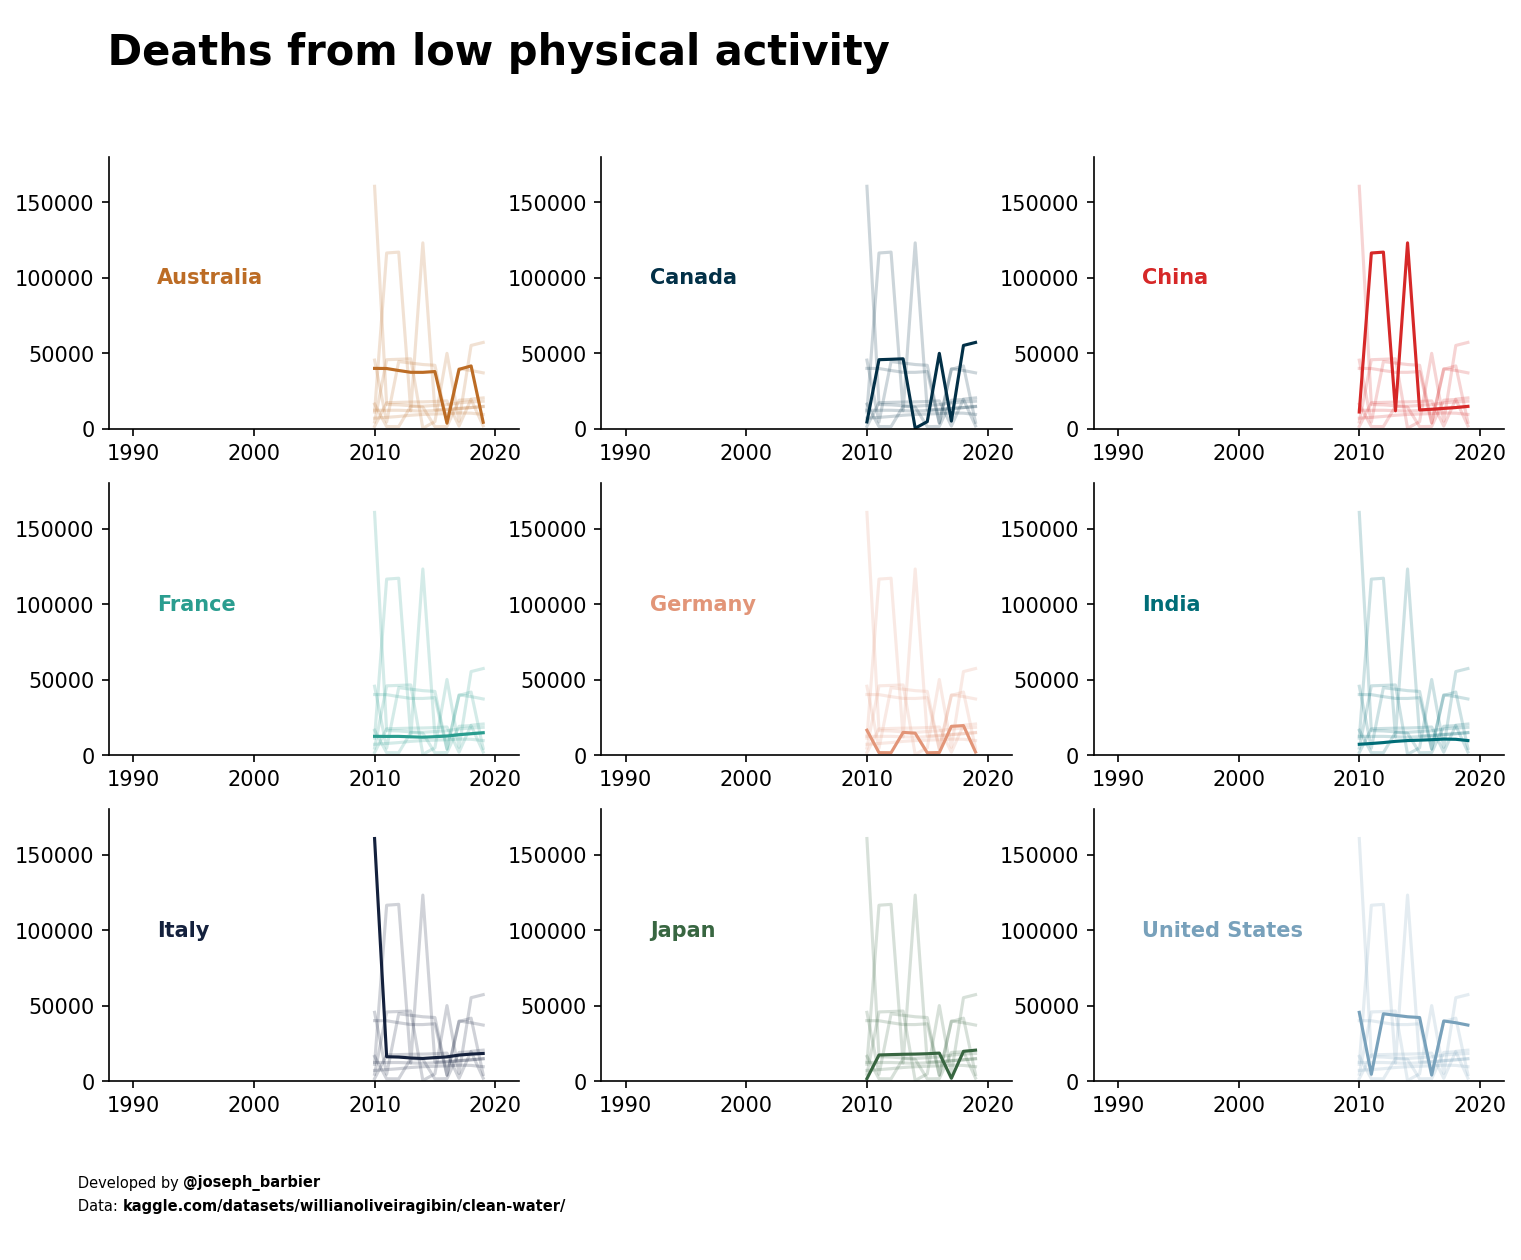

In [129]:
def create_chart(subset_df):
   
   # Plot each group in the subplots
   for i, (group, ax) in enumerate(zip(subset_df[category].unique(), axs.flat)):
      
      ax.clear()
      ax.spines[['right', 'top']].set_visible(False)
      ax.set_facecolor(background_color)

      # Filter for the group
      filtered_subset_df = subset_df[subset_df[category] == group]
      other_groups = subset_df[category].unique()[subset_df[category].unique() != group]
      
      # Plot other groups with lighter colors 
      for other_group in other_groups:

         # Filter observations that are not in the group
         other_y = subset_df[value][subset_df[category] == other_group]
         other_x = subset_df[year][subset_df[category] == other_group]

         # Display the other observations with less opacity
         ax.plot(other_x, other_y, color=colors[i], alpha=0.2)

      # Plot the line of the group
      x = filtered_subset_df[year]
      y = filtered_subset_df[value]
      ax.plot(x, y, color=colors[i])

      # fix axis limits
      ax.set_ylim(0, 180000)
      ax.set_xlim(1988, 2022)
      ax.set_xticks([1990, 2000, 2010, 2020])
      ax.set_yticks([0, 50000, 100000, 150000])

      # add country name
      ax_text(
         1992, 100000,
         group,
         fontsize=10,
         ha='left', va='center',
         color=colors[i],
         fontweight='bold',
         ax=ax
      )

   # title
   title = f"""
   Deaths from <{value.replace("_", " ")}>
   """
   fig_text(
      0.1, 0.95,
      title,
      fontsize=20,
      ha='left', va='center',
      color=text_color,
      fontweight='bold',
      highlight_textprops=[
         {'color': 'black'}
      ],
      fig=fig
   )

   # credit
   credit = """
   Developed by <@joseph_barbier>
   Data: <kaggle.com/datasets/willianoliveiragibin/clean-water/>
   """
   fig_text(
      0.1, 0.01,
      credit,
      fontsize=7,
      ha='left', va='center',
      color=text_color,
      highlight_textprops=[
         {'fontweight': 'bold'},
         {'fontweight': 'bold'}
      ],
      fig=fig
   )

fig, axs = plt.subplots(3, 3, figsize=(12, 8), dpi=150)
create_chart(df)
plt.show()

Original animation finished
Final animation finished!
Time of the GIF: 2.7 seconds


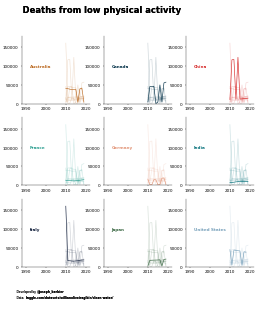

In [130]:
# increase resolution
dpi = 30
plt.rcParams['figure.dpi'] = dpi
plt.rcParams['savefig.dpi'] = dpi

# parameters
category = 'entity'
year = 'year'
value = 'low_physical_activity'
background_color = 'white'
text_color = 'black'

# Create a colormap with a color for each country
num_countries = len(df[category].unique())
colors = [
    '#bc6c25',
    '#023047',
    '#d62828',
    '#2a9d8f',
    '#e29578',
    '#006d77',
    '#14213d',
    '#386641',
    '#78a1bb'
]

# Init a 3x3 charts
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))
fig.set_facecolor(background_color)

def update(frame):

    subset_df = df.iloc[:frame]
    create_chart(subset_df)

# Creating the animation
ani = FuncAnimation(
    fig=fig,
    func=update,
    frames=len(df)
)
ani.save('animation.gif', writer='imagemagick', fps=30)
print('Original animation finished')

# custom duration of frames
with Image.open('animation.gif') as img:
    frames = [frame.copy() for frame in ImageSequence.Iterator(img)]
for i, frame in enumerate(frames):
    frame_duration = 200
    if i == len(frames) - 1:
        frame_duration = 5000
    frame.info['duration'] = frame_duration
frames[0].save('modified_animation.gif', save_all=True, append_images=frames[1:], loop=0)
print('Final animation finished!')

# print time of gif
def time_of_gif(gif_path):
    with Image.open(gif_path) as img:
        duration = 0
        for frame in ImageSequence.Iterator(img):
            duration += frame.info['duration']
    print(f'Time of the GIF: {duration/1000} seconds')
time_of_gif('animation.gif')

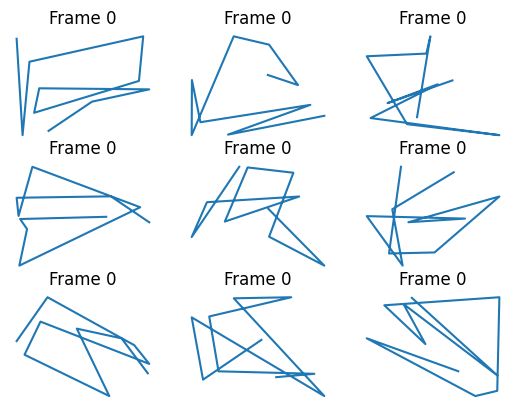

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Create the figure and axes for a 3x3 grid
fig, axes = plt.subplots(3, 3)

# Define the update function for the animation
def update(frame):
    # Update all subplots
    for ax in axes.flat:
        ax.clear()  # Clear current content
        ax.set_axis_off()
        ax.plot(np.random.rand(10), np.random.rand(10))  # Create a new random plot
        ax.set_title(f"Frame {frame}")  # Update title with frame number

# Create the animation
ani = FuncAnimation(fig, update, frames=10, interval=200, blit=False)

# save
ani.save('test.gif', writer='imagemagick', fps=5)
